<a href="https://colab.research.google.com/github/Andrey-Epifanov-k721/conv_networks/blob/master/object_detection_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=500></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h1 style="text-align: center;"><b>Object detection</b></h1>

### Руководитель проекта:
* Юрий Яровиков (AIRI, МФТИ) | tg:@yu_rovikov

<h1 style="text-align: center;"><b>Треки на проекте</b></h1>
На этом проекте есть два возможных трека, из которых нужно выбрать один.

* **Первый трек --- исследовательский**. На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо будет попробовать несколько моделей детекции, самостоятельно реализовать метрики.

* **Второй трек --- продуктовый**. На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Вам необходимо выбрать основной сценарий, по которому вы пойдете, указав это при сдаче работы. При этом, никто не мешает вам совместить два трека, проведя и моделирование, и встраивание в демо. В этом случае мы рекомендуем пойти по **плану из второго трека**, а за моделирование будут ставиться бонусные баллы.

Обратите внимание, что суммарный балл по проекту не может превышать 10. Максимальный балл можно получить на любом из двух треков.

# Исследовательский трек
На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо попробовать несколько моделей детекции и провести их объективное сравнение в соответствии с целевой метрикой проекта.

## План работы




### 1. Выбор фреймворка/библиотеки для использования детектора (1 балл)

Чтобы освежить память о задаче детекции, можно посмотреть [занятия на продвинутом курсе](https://stepik.org/lesson/458312/step/1?unit=616130).

В выборе фреймворка предоставляется свобода, лично я рекомендовал бы один из:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

**Обратите внимание, что для получения полного балла по проекту необходимо обучить и сравнить как минимум две различные модели детекции (можно из одного фреймворка)!**


In [ ]:
# !pip uninstall Pillow==9.4.0
# !pip uninstall Pillow

In [ ]:
# import PIL
# print(PIL.__version__)

In [1]:
# нам необходима библиотека pillow 8.4.0 для преобразования изображений их аугментации и т.д.

# Если при первом запуске версия Pillow 9.4.0 то нужно перезапустить среду выполнения и повторить выполнение этой ячейки. Тогда установится версия Pillow 8.4.0

!pip install Pillow==8.4.0
import PIL
print(PIL.__version__)

8.4.0


In [2]:
!pip install -U torch torchvision

In [3]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [4]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from torch.optim import lr_scheduler


import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

### 2. Выбор датасета (0 баллов)

Вы можете выбрать любой датасет для детекции. Вот несколько идей:
1. [Детекция игровых карт](https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10): лежат в папке images вместе с разметкой;
2. [Детекция фруктов](https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection): скачать можно, нажав на кнопку Download;
3. [Детекция одежды (Deep Fashion 2)](https://github.com/switchablenorms/DeepFashion2): стоит прочитать README на главной странице репозитория. Для получения датасета нужно запросить пароль у автора через гугл-форму. После скачивания распакуйте его с использованием пароля. Из файлов аннотаций нас будут интересовать только `bounding_box`, `category_name` и `category_id`;
4. [Детекция лиц (Wider Face)](http://shuoyang1213.me/WIDERFACE/): большой датасет для детектирования лиц самых разных размеров. Скачать можно прямо по ссылкам на сайте;
5. [Детекция лиц (Kaggle)](https://www.kaggle.com/dataturks/face-detection-in-images): в датасете достаточно мало данных, но можно попробовать, если датасеты выше показались неподходящими для Вас;
6. Датасет из любого соревновани по детекции на Kaggle.

При работе с датасетом вы неизбежно столкнетесь с работой с файлами и папками (директориями). Рекомендуется освежить в памяти работу с библиотеками `os`, `json`, `glob`. Может помочь [этот туториал](https://realpython.com/working-with-files-in-python/).

> Результатом выполнения пункта явлется загруженный датасет, состоящий из изображений и разметки к ним (bounding box'ов всех объектов на каждом изображении).

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
!unzip -q /content/gdrive/MyDrive/archive.zip -d archive

replace archive/images/wider_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [7]:
IMAGES = Path('/content/archive/images')
LABELS = Path('/content/archive/labels')

### 3. Запуск детектора на случайных изображениях (1 балл)

В этом пункте вам необходимо применить модель детектирования в выбранном выше репозитории (по сути проверить, что инференс в модели работает). Таким образом, вы убедитесь, что модель работает, и сможет переходить к обучению.

> Результатом пункта явлется набор изображений, на которых модель успешно отработала и результат детекции виден и понятен.



In [8]:
import random
from PIL import Image, ImageDraw

In [9]:
image_files = list(IMAGES.glob('*.jpg'))

In [10]:
n = 1 # Количество случайных изображений для вывода
random_images = random.sample(image_files, n)

  0%|          | 0/1 [00:00<?, ?it/s]

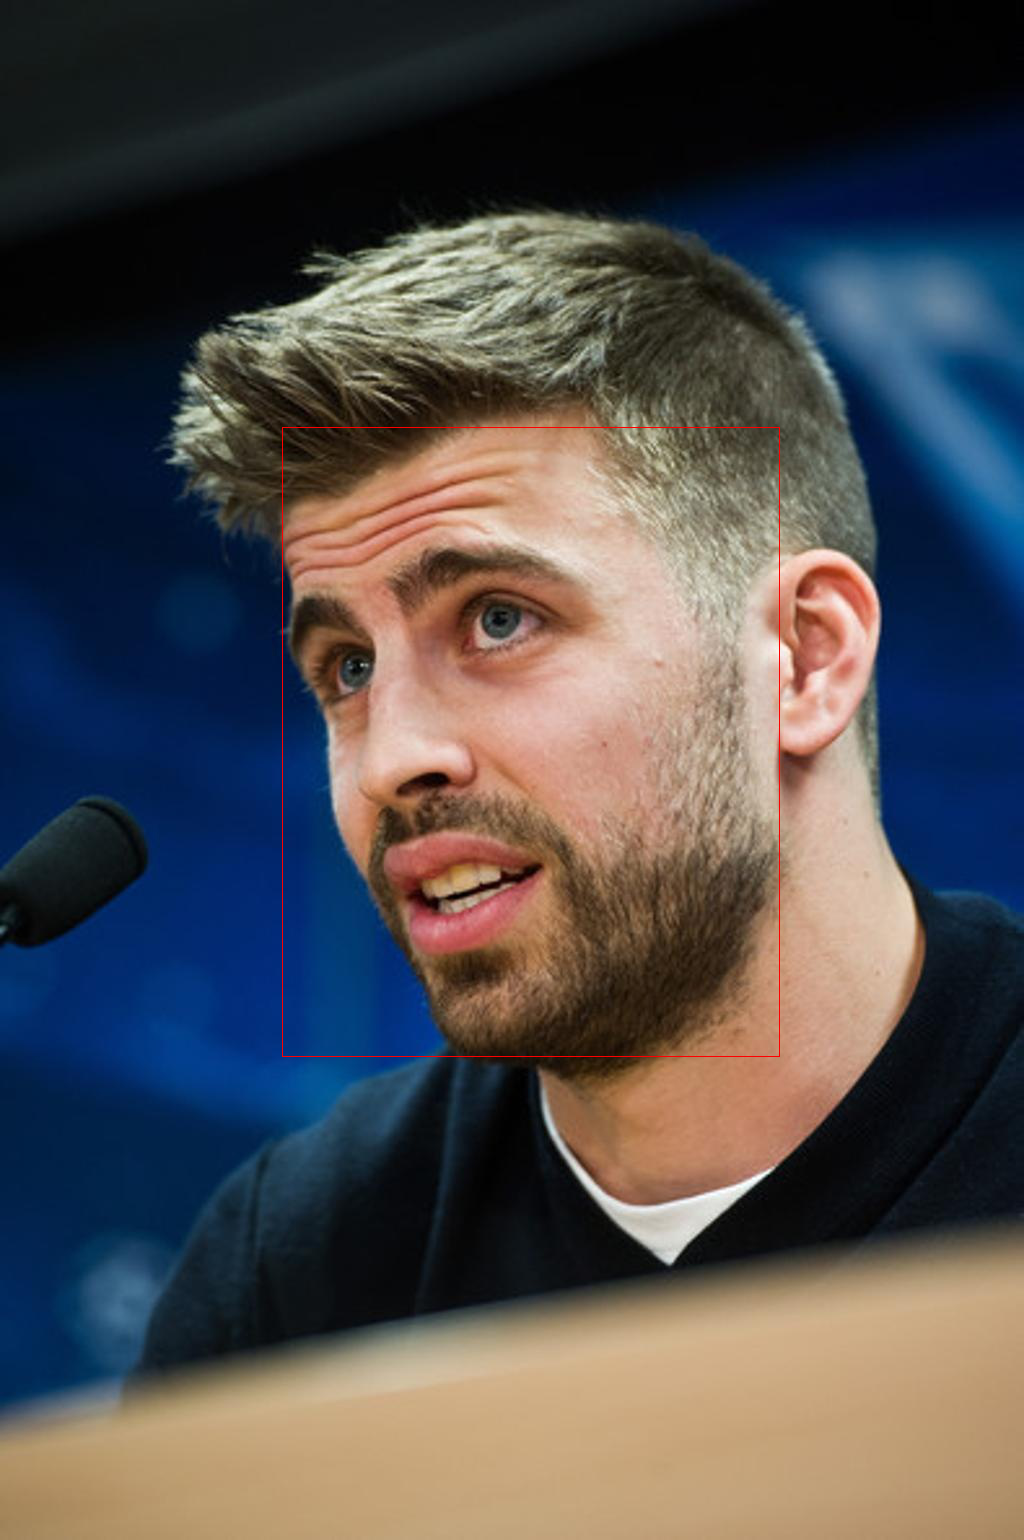

100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


In [11]:
for image_path in tqdm(random_images):
    # Загрузка изображения
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Получение соответствующей метки
    label_path = LABELS / (image_path.stem + '.txt')
    with open(label_path, 'r') as f:
        # Чтение координат боксов из метки
        # Предполагается, что данные хранятся в текстовом файле, каждая строка соответствует одному боксу
        boxes = [list(map(float, line.strip().split())) for line in f]

    # Рисование боксов на изображении
    draw = ImageDraw.Draw(image)
    for box in boxes:
        x, y, w, h = box[1:]  # Пропускаем первый элемент, так как он не используется
        left = (x - w/2) * image_width
        top = (y - h/2) * image_height
        right = (x + w/2) * image_width
        bottom = (y + h/2) * image_height
        draw.rectangle([left, top, right, bottom], outline='red')

    # Вывод изображения
    image.show()


### 4. Предобработка данных (2 балла)

Самый непростой этап в этом сценарии. Скачать данные $-$ лишь половина дела. Чтобы обучить нейросеть на этих данных, нужно написать генератор батчей. Однако если будем подавать изображения так, как они есть, то даже батч собрать не сможем -- нужно привести их к однмоу размеру. Далее нужно привести их к типу float, переместить на CUDA и поделить значения в пикселях на 255 (подробнее см. [занятие](https://www.youtube.com/watch?v=XSPYe4-y4HE)). Также нужно настроить аугментации и постобработку.

То, как именно все это реализовать $-$ зависит от инструмента, выбранного в пункте 1. Например, в detectron2 в обучающих материалах описан формат данных для обучения. Возможно, нужно будет зайти в документацию и почитать более подробно, чтобы разобраться, какой именно нужен формат координат.

НЕ нужно копировать все файлы с картинками и разметкой прямо на диске в их предобработанные версии. Хороший тон $-$ осуществлять всю эту обработку программно, "на лету". Поможет [туториал](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) по написанию своего датасета на PyTorch.

> Результатом выполнения пункта явлется код, запуск которого ведет к подаче батчей правильного вида (разметка приведена к требуемому формату координат, изображения нужного типа, размера и поделены на 255 и т.д.) для обучения нейронной сети-детектора.

In [12]:
from PIL import Image
import os

# Инициализация переменных для хранения максимальных и минимальных размеров
max_width, max_height = 0, 0
min_width, min_height = float('inf'), float('inf')

# Инициализация массивов для хранения индексов изображений с максимальными и минимальными размерами
max_size_indices = []
min_size_indices = []

# Перебор изображений в директории
for i, image_file in tqdm(enumerate(os.listdir(IMAGES))):
    image_path = IMAGES / image_file

    # Загрузка изображения
    image = Image.open(image_path)

    # Получение размеров изображения
    width, height = image.size

    # Обновление максимальных и минимальных размеров
    max_width = max(max_width, width)
    max_height = max(max_height, height)
    min_width = min(min_width, width)
    min_height = min(min_height, height)

    # Проверка, является ли текущее изображение максимальным или минимальным по размеру
    if width == max_width and height == max_height:
        max_size_indices.append(i)
    if width == min_width and height == min_height:
        min_size_indices.append(i)

# Вывод максимальных и минимальных размеров на экран
print("Максимальные размеры изображения:")
print("Ширина:", max_width)
print("Высота:", max_height)
print()
print("Минимальные размеры изображения:")
print("Ширина:", min_width)
print("Высота:", min_height)
print()
print("Кол-во изображений с минимальными размерами: ", len(min_size_indices))
print("Кол-во изображений с максимальными размерами: ", len(max_size_indices))

12880it [00:06, 2041.14it/s]

Максимальные размеры изображения:
Ширина: 1024
Высота: 9108

Минимальные размеры изображения:
Ширина: 1024
Высота: 171

Кол-во изображений с минимальными размерами:  5
Кол-во изображений с максимальными размерами:  13


In [13]:
# # Вывод изображений с максимальными размерами
# print("Изображения с максимальными размерами:")
# for index in max_size_indices:
#     image_file = os.listdir(IMAGES)[index]
#     image_path = IMAGES / image_file
#     image = Image.open(image_path)
#     image.show()

In [14]:
# # Вывод изображений с минимальными размерами
# print("Изображения с минимальными размерами:")
# for index in min_size_indices:
#     image_file = os.listdir(IMAGES)[index]
#     image_path = IMAGES / image_file
#     image = Image.open(image_path)
#     image.show()


In [13]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [14]:
import torch
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, image_dir, label_dir):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_files = sorted(list(image_dir.glob('*.jpg')))
        self.label_files = sorted(list(label_dir.glob('*.txt')))
        self.transform = transforms.Compose([
            transforms.Resize((256, 256)),  # Изменение размера изображения
            transforms.CenterCrop((256, 256)),  # Обрезка изображения до заданного размера
            transforms.ToTensor(),  # Преобразование в тензор
            transforms.Normalize(mean, std)
            # transforms.Normalize([6.61378014, 6.08039109, 5.71897679], [2.10752688, 1.96688839, 1.89585839])
            # transforms.Normalize([0.661378014, 0.608039109, 0.571897679], [0.210752688, 0.196688839, 0.189585839])

            # transforms.Normalize((0.0,), (1.0,))  # Нормализация значений пикселей
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        image_path = self.image_files[index]
        label_path = self.label_files[index]

        # Загрузка изображения
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image).float()  # Преобразование в тип float
        image = image / 1  # Деление значений пикселей на 255 (когда стоит 1 то норм работает и не искажает изображения)



        # Перемещение изображения на устройство CUDA (если доступно)
        if torch.cuda.is_available():
            image = image.cuda()

        # Загрузка меток боксов
        with open(label_path, 'r') as f:
            boxes = [list(map(float, line.strip().split())) for line in f]

        return image, boxes


def get_data(image_dir, label_dir):
    dataset = CustomDataset(image_dir, label_dir)
    return dataset

def custom_collate_fn(batch):
    images = []
    boxes = []

    for image, label in batch:
        images.append(image)
        boxes.append(label)

    # Подготовка пакета изображений
    images = torch.stack(images, dim=0)

    # Возвращение пакета изображений и меток боксов
    print("Возвращение пакета изображений и меток боксов")
    return images, boxes

In [ ]:
# поиск среднего значения и стандартного отклонения для RGB канала по всему датасету

# import os
# from PIL import Image
# import numpy as np

# image_files = sorted([file for file in os.listdir(IMAGES) if file.endswith('.jpg')])

# # Инициализация переменных для накопления суммы пикселей и квадратов пикселей
# pixel_sum = np.zeros(3)
# pixel_squared_sum = np.zeros(3)
# num_images = len(image_files)

# for image_file in tqdm(image_files):
#     image_path = os.path.join(IMAGES, image_file)
#     image = Image.open(image_path).convert('RGB')
#     pixels = np.array(image, dtype=np.float32) / 255.0  # Преобразование в тип float и нормализация значений пикселей

#     # Вычисление суммы пикселей и квадратов пикселей
#     pixel_sum += np.sum(pixels, axis=(0, 1))
#     pixel_squared_sum += np.sum(pixels ** 2, axis=(0, 1))

# # Вычисление среднего значения и стандартного отклонения
# mean = pixel_sum / (num_images * 256 * 256)  # Предполагая, что изображения имеют размер 256x256
# std = np.sqrt(pixel_squared_sum / ((num_images * 256 * 256) - mean ** 2) + 0.00000001)

# print("Mean:", mean)
# print("Std:", std)


100%|██████████| 12880/12880 [18:28<00:00, 11.62it/s]Mean: [6.61378014 6.08039109 5.71897679]
Std: [2.10752688 1.96688839 1.89585839]

После предобработки в transform максимальная и минимальная ширина иммет размеры:

Максимальные размеры изображения:
Ширина: 256
Высота: 256

Минимальные размеры изображения:
Ширина: 256
Высота: 256

Кол-во изображений с минимальными размерами: 12880
Кол-во изображений с максимальными размерами: 12880


In [15]:
import torch
from torch.utils.data import random_split, Subset

# Определение размеров тренировочного, валидационного и тестового наборов данных
train_size = int(0.6 * len(image_files))  # 60% данных для тренировки
val_size = int(0.2 * len(image_files))  # 20% данных для валидации
test_size = len(image_files) - train_size - val_size  # Оставшиеся 20% данных для тестирования

# Разделение датасета на тренировочный, валидационный и тестовый наборы данных
data_tr, data_val, data_test = random_split(get_data(IMAGES, LABELS), [train_size, val_size, test_size])

In [16]:
batch_size = 32

In [17]:
# Оборачиваем данные в даталоадере
# train_dataloader = DataLoader(data_tr, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(data_tr, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, drop_last=True)
# train_loader = DataLoader(data_tr, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(data_val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

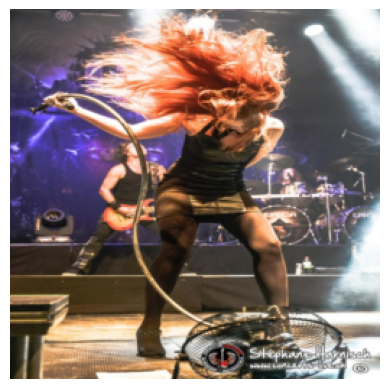

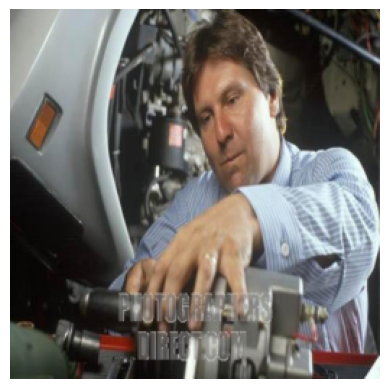

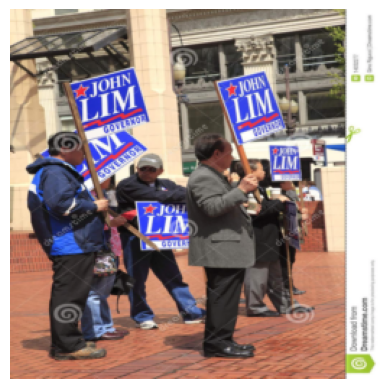

In [18]:
import torch
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

def visualize_subset(dataset, indices):
    for idx in indices:
        image, _ = dataset[idx]

        # Денормализация изображения
        image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

        # Преобразование тензора в изображение PIL
        image_pil = TF.to_pil_image(image)

        # Вывод изображения
        plt.imshow(image_pil)
        plt.axis('off')
        plt.show()


# Пример использования
# Предполагается, что у вас есть объект Subset с именем subset_dataset
indices = [0, 1, 2]  # Индексы изображений, которые нужно вывести
visualize_subset(data_tr, indices)


In [19]:
type(data_tr)

torch.utils.data.dataset.Subset

In [20]:
# data_tr[i][j] где i - порядковый номер картинки, j=0 - матрица картинки, j=1 - векторы координат боксов
print(data_tr[0][1])

[[0.0, 0.6142578125, 0.3155497722836695, 0.0751953125, 0.03773584905660377], [0.0, 0.7529296875, 0.44567338972023424, 0.0361328125, 0.031229668184775537], [0.0, 0.341796875, 0.3786597267404034, 0.0576171875, 0.035783994795055306]]


In [21]:
subset_size = len(data_tr)
subset_shape = data_tr[0][0].size()
print(f"Размер Subset: {subset_size}")
print(f"Форма первого элемента Subset: {subset_shape}")


Размер Subset: 7728
Форма первого элемента Subset: torch.Size([3, 256, 256])


In [22]:
# кол-во изображений в тренировочном, валидационном и тестовом наборах
len(data_tr), len(data_val), len(data_test)

(7728, 2576, 2576)

### 5. Обучение моделей-детекторов (3 балла)

Необходимо написать цикл обучения на PyTorch самостоятельно -- это основной критерий в этом пункте. Необходимо обучить обе выбранные модели.

In [23]:
# реализуем метрику IoU
def iou_pytorch(outputs, targets, eps=1e-7):
    # Получаем бинарные маски из выходов модели
    outputs = (outputs > 0.5).float()
    # Получаем площади пересечения и объединения
    intersection = (outputs * targets).sum()
    union = (outputs + targets).sum() - intersection
    # Вычисляем метрику IOU
    iou = (intersection + eps) / (union + eps)
    return iou.item()

In [24]:
# вспомогательная функция для отладки модели
def print_object_shape(obj):
    if isinstance(obj, torch.Tensor):
        print("Type: torch.Tensor")
        print("Shape:", obj.size())
    elif isinstance(obj, np.ndarray):
        print("Type: numpy.ndarray")
        print("Shape:", obj.shape)
    else:
        print("Type: ", type(obj))

In [25]:
def calculate_iou(estimated_boxes, true_boxes):
    # Разделяем координаты оценок и истинных значений рамок
    x1_e, y1_e, x2_e, y2_e = estimated_boxes[..., 0], estimated_boxes[..., 1], estimated_boxes[..., 2], estimated_boxes[..., 3]
    x1_t, y1_t, x2_t, y2_t = true_boxes[..., 0], true_boxes[..., 1], true_boxes[..., 2], true_boxes[..., 3]

    # Находим координаты верхнего левого угла пересечения
    x1_i = np.maximum(x1_e, x1_t)
    y1_i = np.maximum(y1_e, y1_t)

    # Находим координаты нижнего правого угла пересечения
    x2_i = np.minimum(x2_e, x2_t)
    y2_i = np.minimum(y2_e, y2_t)

    # Вычисляем площади пересечения и истинных рамок
    intersection_area = np.maximum(0, x2_i - x1_i) * np.maximum(0, y2_i - y1_i)
    true_area = (x2_t - x1_t) * (y2_t - y1_t)

    # Вычисляем площадь оцененных рамок
    estimated_area = (x2_e - x1_e) * (y2_e - y1_e)

    # Вычисляем IoU
    iou = intersection_area / (true_area + estimated_area - intersection_area)

    return iou

In [26]:
# Пример использования функции (Проверка)
estimated_boxes = np.random.rand(32, 24528, 4)  # Замените это на ваши оценки
true_boxes = np.random.rand(32, 24528, 4)       # Замените это на истинные рамки
iou_scores = calculate_iou(estimated_boxes, true_boxes)
print(iou_scores.shape)  # Размерности матрицы IoU
print(iou_scores)

(32, 24528)
[[-0.         -0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.25309827 -0.         -0.         ...  0.          0.
  -0.        ]
 [ 0.          0.         -0.         ...  0.          0.
   0.        ]
 ...
 [-0.         -0.          0.         ...  0.         -0.
  -0.        ]
 [ 0.         -0.          0.00471772 ... -0.         -0.
  -0.        ]
 [-0.         -0.          0.         ... -0.         -0.
  -0.        ]]


In [27]:
# Пример тренировочный
A = torch.tensor(np.random.rand(32, 24528, 4))
B = torch.tensor(np.random.rand(32, 5, 4))

A_expanded = A.unsqueeze(-2)
B_expanded = B.unsqueeze(-3)


print(A_expanded.shape)         # Размерности расширенной матрицы A_expanded
print(B_expanded.shape, "\n")   # Размерности расширенной матрицы B_expanded

# Рассчитываем координаты областей пересечения
x_min = torch.max(A_expanded[..., 0], B_expanded[..., 0])
y_min = torch.max(A_expanded[..., 1], B_expanded[..., 1])
x_max = torch.min(A_expanded[..., 2], B_expanded[..., 2])
y_max = torch.min(A_expanded[..., 3], B_expanded[..., 3])

intersection = torch.clamp(x_max - x_min, min=0) * torch.clamp(y_max - y_min, min=0)

# Вычисляем площади боксов и площади объединения
A_area = (A[..., 2] - A[..., 0]) * (A[..., 3] - A[..., 1])
B_area = (B[..., 2] - B[..., 0]) * (B[..., 3] - B[..., 1])
union = A_area.unsqueeze(2) + B_area.unsqueeze(1) - intersection

# Рассчитываем IoU
iou = intersection / union

print("iou.shape: ", iou.shape, "\n")

torch.Size([32, 24528, 1, 4])
torch.Size([32, 1, 5, 4]) 

iou.shape:  torch.Size([32, 24528, 5]) 



In [89]:
# import torch
# import torch.nn as nn

# class IoULoss(nn.Module):
#     def __init__(self):
#         super(IoULoss, self).__init__()

#     def forward(self, pred_boxes, target_boxes):
#         total_loss = 0

#         print("Type pred_boxes:", type(pred_boxes[0]))
#         print("Length pred_boxes:", len(pred_boxes))
#         print("Type target_boxes:", type(target_boxes[0]))
#         print("Length target_boxes:", len(target_boxes))

#         # target_boxes = tuple(target_boxes)
#         target_boxes = target_boxes.tolist()

#         print("Type pred_boxes:", type(pred_boxes))
#         print("Length pred_boxes:", len(pred_boxes))
#         print("Type target_boxes:", type(target_boxes))
#         print("Length target_boxes:", len(target_boxes))


#         for i, box in enumerate(target_boxes):
#             box_tensor = torch.tensor(box)
#             print(f"Размерность target_boxes[{i}]:", box_tensor.size())

#         # print("pred_boxes:", print_object_shape(pred_boxes))
#         # print("target_boxes:", print_object_shape(target_boxes))

#         for i in range(len(pred_boxes)):
#             pred_box = pred_boxes[i]
#             target_box = target_boxes[i]


#             # Преобразование кортежей в тензоры
#             pred_box = torch.tensor(pred_box)
#             target_box = torch.tensor(target_box)

#             # Расчет координат прямоугольников
#             x1 = torch.max(pred_box[0], target_box[0])
#             y1 = torch.max(pred_box[1], target_box[1])
#             x2 = torch.min(pred_box[2], target_box[2])
#             y2 = torch.min(pred_box[3], target_box[3])

#             # Расчет площадей пересечения и объединения
#             intersection = torch.clamp(x2 - x1, min=0) * torch.clamp(y2 - y1, min=0)
#             union = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1]) + \
#                     (target_box[2] - target_box[0]) * (target_box[3] - target_box[1]) - intersection

#             # Расчет индекса пересечения и объединения
#             iou = intersection / union

#             # Расчет функции потерь
#             loss = 1 - iou

#             total_loss += loss

#         # Усреднение потерь
#         avg_loss = total_loss / len(pred_boxes)

#         return avg_loss



In [155]:
# def calculate_iou(predict_box, target_box):
#     """
#     Вычисляет IoU между двумя наборами рамок.

#     Args:
#     - predict_box: тензор с координатами рамок 1. Shape: [batch_size, num_boxes, 4]
#     - target_box: тензор с координатами рамок 2. Shape: [batch_size, num_boxes, 4]

#     Returns:
#     - ious: тензор с IoU между каждой парой рамок. Shape: [batch_size, num_boxes]
#     """
#     # Извлекаем координаты рамок
#     x_min1, y_min1, x_max1, y_max1 = predict_box[..., 0], predict_box[..., 1], predict_box[..., 2], predict_box[..., 3]
#     x_min2, y_min2, x_max2, y_max2 = target_box[..., 0], target_box[..., 1], target_box[..., 2], target_box[..., 3]

#     # Находим области пересечения
#     inter_x_min = torch.max(x_min1, x_min2)
#     inter_y_min = torch.max(y_min1, y_min2)
#     inter_x_max = torch.min(x_max1, x_max2)
#     inter_y_max = torch.min(y_max1, y_max2)

#     # Площадь пересечения
#     inter_area = torch.clamp(inter_x_max - inter_x_min, min=0) * torch.clamp(inter_y_max - inter_y_min, min=0)

#     # Площадь каждого из прямоугольников
#     area1 = (x_max1 - x_min1) * (y_max1 - y_min1)
#     area2 = (x_max2 - x_min2) * (y_max2 - y_min2)

#     # Площадь объединения
#     union_area = area1 + area2 - inter_area

#     # IoU
#     ious = inter_area / torch.clamp(union_area, min=1e-8)

#     return ious

In [407]:
def calculate_iou(predicted_boxes, target_boxes):
    """
    Функция для вычисления метрики Intersection over Union (IoU) для каждой пары bbox.

    Args:
    predicted_boxes (torch.Tensor): Тензор с предсказанными bbox размерности [32, 24528, 4].
    target_boxes (torch.Tensor): Тензор с таргетными bbox размерности [32, n, 4], где n может варьироваться по изображениям.

    Returns:
    torch.Tensor: Тензор с вычисленными значениями IoU размерности [32, 24528, n].
    """
    batch_size = predicted_boxes.size(0)
    # num_predicted_boxes = predicted_boxes.size(1)
    # num_target_boxes_list = [target_boxes.size(1) for target_boxes in target_boxes]

    ious = []
    for i in range(batch_size):
        x_min1, y_min1, x_max1, y_max1 = predicted_boxes[i, :, 0], predicted_boxes[i, :, 1], predicted_boxes[i, :, 2], predicted_boxes[i, :, 3]
        x_min2, y_min2, x_max2, y_max2 = target_boxes[i][:, 0], target_boxes[i][:, 1], target_boxes[i][:, 2], target_boxes[i][:, 3]

        inter_x_min = torch.max(x_min1[:, None], x_min2)  # Расширяем x_min1 до соответствующих размеров
        inter_y_min = torch.max(y_min1[:, None], y_min2)  # Расширяем y_min1 до соответствующих размеров
        inter_x_max = torch.min(x_max1[:, None], x_max2)  # Расширяем x_max1 до соответствующих размеров
        inter_y_max = torch.min(y_max1[:, None], y_max2)  # Расширяем y_max1 до соответствующих размеров

        # Вычисляем площадь пересечения
        inter_area = torch.clamp(inter_x_max - inter_x_min, min=0) * torch.clamp(inter_y_max - inter_y_min, min=0)

        # Вычисляем площади bbox
        area1 = (x_max1 - x_min1) * (y_max1 - y_min1)
        area2 = (x_max2 - x_min2) * (y_max2 - y_min2)

        # Вычисляем площадь объединения
        union_area = area1[:, None] + area2 - inter_area

        # Вычисляем IoU
        iou = inter_area / union_area

        ious.append(iou)

    ious_tensor = torch.stack(ious, dim=0)
    print('ious_tensor: ', ious_tensor.type(), ious_tensor.size())
    print('calculate_iou отработал')

    return ious_tensor

In [408]:
import torch
import torch.nn as nn

class IoULoss(nn.Module):
    def __init__(self):
        super(IoULoss, self).__init__()

    def forward(self, pred_boxes, target_boxes):
        total_loss = 0
        pred_boxes_locs = pred_boxes[0]
        pred_boxes_confs = pred_boxes[1]
        print(type(pred_boxes_locs), pred_boxes_locs.size())
        print(type(pred_boxes_confs), pred_boxes_confs.size())

        calculate_iou(pred_boxes_locs, target_boxes)



        return

In [409]:
# код для тестов (можно удалять)
outputs = (torch.ones((32, 24528, 4)), torch.ones((32, 24528, 2)))
batch_boxes = torch.ones((32, 44, 5))
print("тип outputs", type(outputs))
print("тип batch_boxes", type(batch_boxes))

тип outputs <class 'tuple'>
тип batch_boxes <class 'torch.Tensor'>


In [410]:
# код для тестов (можно удалять)
loss_fn = IoULoss()

In [411]:
# код для тестов (можно удалять)
loss_fn(outputs, batch_boxes)

<class 'torch.Tensor'> torch.Size([32, 24528, 4])
<class 'torch.Tensor'> torch.Size([32, 24528, 2])
ious_tensor:  torch.FloatTensor torch.Size([32, 24528, 44])
calculate_iou отработал


In [412]:
# # использовалось изначально в функции train для визуализации батчей картинок
# import torch
# import torchvision.transforms.functional as TF
# from PIL import Image
# from tqdm import tqdm

# def visualize_batch(batch_images):
#     for image in tqdm(batch_images):
#         # Перевод тензора в диапазон значений [0, 255]
#         image = (image * 255).byte()

#         # Преобразование тензора в изображение PIL
#         image_pil = Image.fromarray(image.permute(1, 2, 0).cpu().numpy())

#         # Вывод изображения
#         image_pil.show()


In [413]:
import math
def generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios):
    prior_boxes = []
    for k, feature_map_size in enumerate(feature_map_sizes):
        for i in range(feature_map_size[0]):
            for j in range(feature_map_size[1]):
                cx = (j + 0.5) / feature_map_size[1]
                cy = (i + 0.5) / feature_map_size[0]

                for aspect_ratio in aspect_ratios[k]:
                    prior_width = math.sqrt(aspect_ratio)
                    prior_height = 1.0 / math.sqrt(aspect_ratio)

                    prior_boxes.append([
                        cx,
                        cy,
                        prior_width,
                        prior_height
                    ])

    prior_boxes = torch.FloatTensor(prior_boxes)
    prior_boxes.clamp_(0, 1)  # Ограничение координат в пределах [0, 1]

    # Корректировка размеров prior-якорей для соответствия размеру изображения
    prior_boxes[:, 0] *= image_size[1]  # cx
    prior_boxes[:, 1] *= image_size[0]  # cy
    prior_boxes[:, 2] *= image_size[1]  # width
    prior_boxes[:, 3] *= image_size[0]  # height

    return prior_boxes


In [414]:
# Генерация prior-якорей
image_size = (256, 256)
feature_map_sizes = [(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)]
aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5], [1, 2, 0.5]]
prior_boxes = generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios)

In [415]:
def input_channels(k):
    x = sources[k].size(1)
    return x

In [416]:
def visualize_loader(loader):
    # Задайте значения mean и std для обратной нормализации
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    for image in loader:
        # Обратная нормализация
        image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

        # Преобразование тензора в изображение PIL
        image_pil = TF.to_pil_image(image)

        # Отображение изображения
        plt.imshow(image_pil)
        plt.show()

In [417]:
def visualize_loader_1(loader):
    # Задайте значения mean и std для обратной нормализации
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    for batch_images, _ in loader:
        for image in batch_images:

            # Обратная нормализация
            image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

            # Преобразование тензора в изображение PIL
            image_pil = TF.to_pil_image(image)

            # Отображение изображения
            plt.imshow(image_pil)
            plt.show()

In [418]:
# чтобы проверить работу visualize_loader нужно использовать строчку: for batch_images, _ in loader:
# visualize_loader_1(train_loader)

In [419]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SSD(nn.Module):
    def __init__(self, num_classes, prior_boxes):
        super(SSD, self).__init__()
        self.num_classes = num_classes
        self.prior_boxes = prior_boxes

        # Feature extraction layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # Conv1
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # Conv2
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool1           torch.Size([32, 64, 128, 128])

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Conv3    torch.Size([32, 128, 128, 128])
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Conv4
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool2           torch.Size([32, 128, 64, 64])

            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Conv5   torch.Size([32, 256, 64, 64])
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Conv6
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Conv7
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool3           torch.Size([32, 256, 32, 32]) __ в sources

            nn.Conv2d(256, 512, kernel_size=3, padding=1),  # Conv8   torch.Size([32, 512, 32, 32])
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv9
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv10
            nn.ReLU(inplace=True),                                    # работает только до сюда
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool4           __ в sources (torch.Size([32, 512, 16, 16]))

            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv11
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv12
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv13
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),  # Pool5
            nn.Conv2d(512, 1024, kernel_size=3, padding=6, dilation=6),  # Conv14   torch.Size([32, 1024, 16, 16])
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=1),  # Conv15
            nn.ReLU(inplace=True)
        )

        # Вспомогательные слои свертки для обнаружения
        self.extra_layers = nn.ModuleList([
            nn.Conv2d(1024, 256, kernel_size=1),  # Conv16_1
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # Conv16_2
            nn.Conv2d(512, 128, kernel_size=1),  # Conv17_1
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # Conv17_2
            nn.Conv2d(256, 128, kernel_size=1),  # Conv18_1
            nn.Conv2d(128, 256, kernel_size=3),  # Conv18_2
            nn.Conv2d(256, 128, kernel_size=2),  # Conv19_1
            nn.Conv2d(128, 256, kernel_size=1),  # Conv19_2
        ])

        #  new_height = (old_height - kernel_size + 2 * padding) / stride + 1

        # Слои локализации и классификации
        self.loc_layers = nn.ModuleList()
        self.conf_layers = nn.ModuleList()


    def forward(self, x):
        global sources
        sources = []
        locs = []
        confs = []

        # The number of default boxes per feature map location
        # Количество деболт боксов на каждую локализацию на карте признаков.
        mbox_sizes = [4, 6, 6, 6, 4, 4]

        # Слои фючер экстрактора
        for i in range(35):
            x = self.features[i](x)
            print(x.size())
            if i in {9, 16, 23}:
                sources.append(x)
                print('слои из sources: ', x.size())

        print("далее отладка extra_layers")

        # Дополнительный слой
        for i, layer in enumerate(self.extra_layers):
            print(f"SIZE_x: {i}", x.size())
            x = F.relu(layer(x))
            print("__", x.size())

            if i % 2 == 1:
                sources.append(x)
                print("append extra_layer size: ", x.size())

        print("количество карт в sources:", len(sources))

        # print(f"В sources попали карты карты активации с размерами: ")

        print("отладка extra_layers и extraction layers завершена")


        print("начинается отладка слоев локализации и классификации")

        for k, mbox_size in enumerate(mbox_sizes):
            print("k: ", k)
            print("kексина")
            self.loc_layers.append(nn.Conv2d(input_channels(k), mbox_size * 4, kernel_size=3, padding=1))
            self.conf_layers.append(nn.Conv2d(input_channels(k), mbox_size * self.num_classes, kernel_size=3, padding=1))

        # Применим слои локализации(пргонозирования) и классификации к исходным объектам (sources)
        for (x, l, c) in zip(sources, self.loc_layers, self.conf_layers):
            print("size x: ", x.size())
            locs.append(l(x))
            confs.append(c(x))


        print("длина списка locs:", len(locs))
        for i in range(len(locs)):
            print(f"размерность locs[{i}] сразу после свертки: {locs[i].size()}")

        print("длина списка confs:", len(confs))
        for i in range(len(confs)):
            print(f"размерность confs[{i}] сразу после свертки: {confs[i].size()}")


        # Инициализируем transformed_locs как None
        transformed_locs = None
        for loc in locs:
            # Переформируем каждый тензор с размерностью [32, 6, 4, X, Y] в [32, 6*X*Y, 4]
            transformed_loc = loc.view(loc.size(0), -1, 4)

            # Если transformed_locs еще не инициализирован, просто присвоим ему текущий тензор
            if transformed_locs is None:
                transformed_locs = transformed_loc
            else:
                # Если transformed_locs уже содержит тензоры, пристыкуем новый тензор вдоль второй размерности
                transformed_locs = torch.cat((transformed_locs, transformed_loc), dim=1)
            print("промежуточная размерность transformed_locs для приора ", transformed_locs.size())


        # Инициализируем transformed_confs как None
        transformed_confs = None
        for loc in confs:
            # Переформируем каждый тензор с размерностью [32, 6, 2, X, Y] в [32, 6*X*Y, 2]
            transformed_conf = loc.view(loc.size(0), -1, 2)

            # Если transformed_confs еще не инициализирован, просто присвоим ему текущий тензор
            if transformed_confs is None:
                transformed_confs = transformed_conf
            else:
                # Если transformed_confs уже содержит тензоры, пристыкуем новый тензор вдоль второй размерности
                transformed_confs = torch.cat((transformed_confs, transformed_conf), dim=1)
            print("промежуточная размерность transformed_confs для приора ", transformed_confs.size())


        print("размер transformed_locs: ", transformed_locs.size())
        print("размер transformed_confs: ", transformed_confs.size())

        print("тип transformed_locs: ", type(transformed_locs))
        print("тип transformed_confs: ", type(transformed_confs))

        print("ОТЛАДКА АРХИТЕКТУРЫ ЗАВЕРШЕНА")

        return transformed_locs, transformed_confs

In [420]:
# # mbox_sizes = [4, 6, 6, 6, 4, 4]
# for i in sources:
#     print(i.shape)

# # умножая 64*64*4 и так для всех получим 24538 приор (без учета последней 1х1), а 24538*4 = 98112 приор

In [421]:
def pad_and_convert_to_tensor(batch_boxes):
    """
    Функция для дополнения подсписков нулями до максимальной длины и
    конвертации списка в тензор.

    Args:
    batch_boxes (list of list of int/float): Список с подсписками разной длины.

    Returns:
    torch.Tensor: Тензор с дополненными подсписками.
    """

    # Находим максимальную длину подсписка
    max_length = max(len(sublist) for sublist in batch_boxes)

    # Дополняем подсписки нулями до максимальной длины
    padded_batch_boxes = [sublist + [0] * (max_length - len(sublist)) for sublist in batch_boxes]

    # Переводим в тензор
    batch_boxes_tensor = torch.tensor(padded_batch_boxes)

    return batch_boxes_tensor

In [422]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    # Создание scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_iou = 0.0

        for batch in data_tr:
            # Распаковка пакета данных
            batch_images, batch_boxes = batch

            # Перемещение данных на устройство (если доступно) batch_images.size:  torch.Size([32, 3, 256, 256]) batch_boxes.type:  <class 'list'> batch_boxes.len: 32
            # как выглядят значения координат одного бокса:  [[0.0, 0.54296875, 0.4941348973607038, 0.12109375, 0.19648093841642228]] // [n, 5] здесь n=1,  n - зависит от кол-ва объектов на фото
            # первая координата - 0.0 это номер класса
            if torch.cuda.is_available():
                batch_images = batch_images.cuda()
                batch_boxes = batch_boxes.cuda()

            print('batch_images.size: ', batch_images.size())


            print(batch_boxes)
            print('batch_boxes.type: ', type(batch_boxes))
            print('batch_boxes[0].type: ', type(batch_boxes[0]))
            print('batch_boxes.len: ', len(batch_boxes))
            print('как выглядят значения координат одного бокса: ', batch_boxes[0])


# ######

            # Преобразуем каждый вложенный список в тензор
            tensor_list = [torch.tensor(sublist) for sublist in batch_boxes]

            # Находим максимальную длину вложенных списков
            max_length = max(len(sublist) for sublist in batch_boxes)

            # Дополняем каждый вложенный список до максимальной длины нулями
            padded_tensor_list = [torch.cat((torch.tensor(sublist), torch.zeros((max_length - len(sublist), len(sublist[0]))))) for sublist in tensor_list]

            # Преобразуем обновленную структуру в тензор
            batch_boxes = torch.stack(padded_tensor_list)

            print('Переведем тип batch_boxes из list в torch.Tensor')
            print('batch_boxes.type: ', type(batch_boxes))

########






            # визуализация входящих в нейронку картинок (количество картинок = размеру пакета)
            # visualize_loader(batch_images)

            # Обнуление градиентов
            opt.zero_grad()

            # Прямой проход модели
            outputs = model(batch_images)

            # Расчет функции потерь
            loss = loss_fn(outputs, batch_boxes)

            # Обратный проход и оптимизация
            loss.backward()
            opt.step()

            # Суммирование потерь
            total_loss += loss.item()

            # Вычисление метрики IOU
            iou = iou_pytorch(outputs, batch_boxes)
            total_iou += iou

        # Вычисление средней потери и метрики IOU для эпохи
        avg_loss = total_loss / len(data_tr)
        avg_iou = total_iou / len(data_tr)

        # Применение scheduler
        scheduler.step()

        # Вывод результатов
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, IOU: {avg_iou:.4f}")


In [423]:
# очистка памяти

import gc
gc.collect()

0

In [424]:
# sizes_maps_in_sources = [sources[x].size() for x in range(len(sources))]
# output = "\n".join([str(size) for size in sizes_maps_in_sources])
# print(f"В sources попали карты карты активации с размерами:\n{output}")

In [425]:
# sources[0].size(1)

In [426]:
import torch

input_tensor = torch.randn(32, 3, 256, 256)
conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
output_tensor = conv1(input_tensor)
print(output_tensor.size())

torch.Size([32, 64, 256, 256])


In [427]:
model=SSD(num_classes=2, prior_boxes=prior_boxes)

# Перемещение модели на устройство (если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

In [428]:
# transforms.Normalize([0.661378014, 0.608039109, 0.571897679], [0.210752688, 0.196688839, 0.189585839])

In [429]:
# # посмотрим внутреннюю структуру пакета даталоадера
# batch = next(iter(train_loader))
# for item in batch:
#     print(item.size())

In [430]:
epochs = 2

# Создание оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Создание функции потерь
loss_fn = IoULoss()

In [431]:
# optimizer.zero_grad()

In [432]:
# Вызов функции train
train(model, optimizer, loss_fn, epochs, train_loader, data_val)

Возвращение пакета изображений и меток боксов
batch_images.size:  torch.Size([32, 3, 256, 256])
[[[0.0, 0.533203125, 0.3501259445843829, 0.4091796875, 0.5180520570948782]], [[0.0, 0.45703125, 0.43859649122807015, 0.0107421875, 0.03508771929824561], [0.0, 0.2900390625, 0.3208020050125313, 0.0126953125, 0.040100250626566414]], [[0.0, 0.4755859375, 0.39692044482463645, 0.416015625, 0.544054747647562]], [[0.0, 0.6767578125, 0.20833333333333334, 0.0595703125, 0.08723958333333333], [0.0, 0.5205078125, 0.3059895833333333, 0.056640625, 0.08854166666666667], [0.0, 0.3623046875, 0.21744791666666666, 0.0634765625, 0.12109375]], [[0.0, 0.61328125, 0.3695121951219512, 0.029296875, 0.03902439024390244], [0.0, 0.5087890625, 0.40487804878048783, 0.0234375, 0.03414634146341464], [0.0, 0.568359375, 0.5439024390243903, 0.0205078125, 0.026829268292682926], [0.0, 0.455078125, 0.5390243902439025, 0.0224609375, 0.032926829268292684], [0.0, 0.3388671875, 0.3280487804878049, 0.0263671875, 0.03902439024390244]]

<ipython-input-422-8aead4631d21>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_tensor_list = [torch.cat((torch.tensor(sublist), torch.zeros((max_length - len(sublist), len(sublist[0]))))) for sublist in tensor_list]


torch.Size([32, 64, 256, 256])
torch.Size([32, 64, 256, 256])
torch.Size([32, 64, 256, 256])
torch.Size([32, 64, 256, 256])
torch.Size([32, 64, 128, 128])
torch.Size([32, 128, 128, 128])
torch.Size([32, 128, 128, 128])
torch.Size([32, 128, 128, 128])
torch.Size([32, 128, 128, 128])
torch.Size([32, 128, 64, 64])
слои из sources:  torch.Size([32, 128, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 64, 64])
torch.Size([32, 256, 32, 32])
слои из sources:  torch.Size([32, 256, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 32, 32])
torch.Size([32, 512, 16, 16])
слои из sources:  torch.Size([32, 512, 16, 16])
torch.Size([32, 512, 16, 16])
torch.Size([32, 512, 16, 16])
torch.Size([32, 512, 16, 16])
torch.Size([32, 512, 16, 16])
tor

AttributeError: 'NoneType' object has no attribute 'backward'

> Результатом выполнения пункта явлется код, запуск которого ведет к обучению модели на выбранном датасете. При обучении **обязательно выводить числовые значения лосса на трейне и валидации**, крайне желательно использовать [`TensorBoard`](https://pytorch.org/docs/stable/tensorboard.html) для визуализации. Обязательно также сохранять модель после каждой N-ой эпохи, чтобы потом ее качество можно было проверить и веса были переиспользуемыми.

### 6. Измерение качества работы модели (метрики согласуются с руководителем и зависят от задачи) (2 балла)

Под метриками понимаются функции/формулы, по которым оценивается качество модели-детектора. Обычно для измерения качества работы детектора используют поклассовые Precision, Recall, F1-меру и mean Average Precision (mAP). Подробнее про них можно послушать в [видеолекции 2018 года](https://www.youtube.com/watch?v=ewkSI2cuyoQ&list=PL0Ks75aof3ThkitsZbUOEQg7Ybl5kB_s3&index=24).

**Необходимо самостоятельно реализовать требуемые метрики!**

> Результат пункта --- реализованные функции метрик для задачи детектирования, позволяющие оценить качество работы модели на выборке, а также оценка обеих обученных моделей по данным метрикам на test. Необходимо сделать вывод о том, какая модель сработала лучше и оценить полученный результат.

### 7. Поиск путей применения этой модели в бизнесе/реальных задачах/набросок встраивания в веб/мобильное демо (1 балл)

В этом пункте нужно подумать, как эта модель может быть использована в дальнейшем. То есть, например, зачем нужно детектировать фрукты? Или одежду?

> Результат пункта $-$ перечисленные кейсы использования модели (описанные **как можно подробнее**).

**IMPORTANT NOTE:** Обычно этим вопросом все же задаются до начала какой-либо разработки. Но поскольку проект носит учебный/исследовательский характер, допустимо говорить об этом в конце

# Продуктовый трек

На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель детекции в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Ваша модель не обязательно должна содержать в себе лишь детекцию: например, существуют составные модели, которые осуществляют детекцию лиц на фотографии и определяют их настроение/возраст. Такие модели тоже можно и даже желательно использовать, если того требует проект. Единственное требование --- чтобы детекция присутствовала в качестве основной/вспомогательной задачи.

Если у Вас есть опыт веб- или мобильной разработки, можете работать в рамках привычных Вам инструментов. Главное, чтобы в итоге они позволяил встроить в себя нейросетевой детектор, на вход которому будут поступать картинки.

Изображения на вход демо могут поступать с веб-камеры, из файлов, по ссылке или с камеры мобильного телефона -- способ должен вытекать из предполагаемого сценария применения вашего продукта. Демо должно показывать, что детектор успешно отрабатывает на поданных изображениях и находит нужные объекты.

## План работы

### 1. Поиск проблемы и описание решения (2 балла)
В этом пункте необходимо сформулировать проблему реального мира и продумать, как именно она будет решаться с помощью вашего продукта.

#### Как должен быть устроен ваш продукт
Здесь мы не будем подробно обсуждать, как создавать IT-продукты, которые будут пользоваться широким спросом и способны генерировать выручку. Но кратко опишем!

1. **Ваш продукт должен решать существующую проблему**. Исследования показывают, что это основная причина провала стартапов --- решение не существующей проблемы. О том, как создать стартап, который решает реальную проблему пользователя, можно прочитать [здесь](https://stfalcon.com/ru/blog/post/startups-solving-user-problems). Также есть отличная книжка "Спроси маму", которую необходимо прочитать любому человеку, который создает свой продукт.

2. **Ваш продукт должен иметь целевую аудиторию**. Этот пункт увязан с предыдущим. Если у продукта нет целевой аудитории, его никто не будет использовать.

3. **Ваш продукт должен быть оформлен в сервис, подходящий для основного сценария использования продукта и целевой аудитории**. Предположим, например, что вы делаете цифровой сервис для распознавания языка жестов. Как может выглядеть такой продукт и в какой сервис он может быть внедрён? Например, если создать ТГ-бота, который будет детектировать и распознавать жест по фотографии, его довольно сложно будет использовать, потому что каждый жест в отдельности сфотографировать нельзя. Оптимальным решением в этом случае было бы мобильное приложение с потоковым детектированием жеста на видео и автоматическим добавлением субтитров. При этом именно такой продукт может быть слишком сложен в реализации. Тогда необходимо выбрать оформление сервиса, которое будет осмысленно с продуктовой точки зрения и которое вы при этом сможете реализовать.

#### Как искать проблему
Есть много способов найти важную и актуальную проблему. Некоторые советы перечислены в книге "Спроси маму". Несколько коротких советов можно найти [здесь](https://vc.ru/life/1735-startup-ideas).
* Можно подумать о темах, которые близки лично вам/вашим знакомым. Если проект решает проблему даже узкой целевой аудитории, это не страшно.
* Можно найти уже существующий проект и улучшить его, обозначив, в чем преимущество вашего решения перед конкурентами.
* У человечества вообще много глобальных [проблем](https://www.un.org/sustainabledevelopment/ru/sustainable-development-goals/), над которыми борются различные мировые организации. Если ваш проект способен хоть в каком-то частном случае продвинуться к решению этих проблем, это уже будет отлично.
* Для поиска идей можно использовать датасеты с kaggle.

> Результат пункта -- подробное описание проблемы, которую вы решаете, целевая аудитория использования продукта, а также **подробное** описание сервиса, который предлагается создать. Допускается описать "идеальный продукт", а затем создать MVP, имеющий отклонения от оптимального варианта, сославшись на ограниченное время/ресурсы для выполнения проекта. Но тогда это необходимо отдельно упомянуть в этом пункте.

### 2. Поиск обученной модели и датасета (1 балл)

В этом пункте вам необходимо выбрать модель, которую вы встроите в ваш продукт, и датасет, на котором вы эту модель будете тестировать.

* Если вы найдете готовую модель, которую можно применить для вашей задачи, можно просто взять её. В этом случае с датасетом можно особо не заморачиваться. Достаточно в этом пункте запустить ваш детектор на нескольких (5-7) изображениях, на которых модель будет в итоге применяться, и проверить, что модель на них хорошо работает.


### Бонус. 2.5. Обучение модели для вашей задачи (5 баллов)
**За этот пункт ставятся бонусные баллы. Он не является обязательным.**

Если готовой обученной модели вы не смогли найти, тогда необходимо будет обучить модель самостоятельно. В таком случае перед выполнением пункта 2 вам необходимо будет найти подходящий датасет и обучить любую модель детекции с помощью встроенных методов из фреймворков, описанных в первом сценарии:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

После обучения модель нужно будет протестировать на real-world изображениях, на которых планируется использовать продукт.

### 3. Выбор фреймворка/библиотеки для разработки веб/мобильного демо (0 баллов)

Основным инструментом для разработки веб-демо будет микрофреймворк **Flask**: [серия туториалов на русском](https://habr.com/ru/post/346306/).   
Полезные ресуры:
- [курс по веб-разработке](https://www.youtube.com/playlist?list=PLzQrZe3EemP5KsgWGnmC0QrOzQqjg3Kd5), нас интересуют первые 7 видео в плейлисте. В частности, нужны видео по Flask, там очень хорошие обучалки параллельно с лектором;
- [исчерпывающий справочник по Flask (англ)](https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python3_Flask.html);
- можно посмотреть мой [репозиторий с реализацией веб-демо](https://github.com/izaharkin/Respalyzer) для ML-задачи оценки отзывов.

Для разработки мобильного демо стоит выбрать инстурмент на свое усмотрение:
- под Android: [пример на Pytorch Mobile](https://towardsdatascience.com/object-detector-android-app-using-pytorch-mobile-neural-network-407c419b56cd), [пример на TensorFlow Lite](https://www.tensorflow.org/lite/models/object_detection/overview). **Примечание** от Дмитрия Шумилина: на Android с TF Lite на момент января 2021 есть [ошибка](https://github.com/tensorflow/models/issues/9341) с новым форматом хранения модели. Можно попробовать возможное [решение](https://www.youtube.com/watch?v=syTKGY-H44E&ab_channel=DoomsdayRobotics) или писать на чистом Java. Также можно попробовать использовать более старые версии TensorFlow, в которых проблем совместимости еще не было, например, [v2.1.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.1.0).
- под iOS: [пример на TensorFlow Lite Swift API](https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_swift), [пример с Vision Framework](https://developer.apple.com/documentation/vision/recognizing_objects_in_live_capture) на "чистом" Swift'е.

Разумеется, лучше **самостоятельно поискать видео/статьи** на тему использования моделей на мобильных устройствах.

> Результатом пункта является зафисированный для вас инструмент для разработки демо.

### 4. Разработка демо (3 балла)

Этот пункт про сам процесс написания кода для демо.

> Результатом пункта является код, который можно запустить. Не хватать будет только логики детектора, сам интерфейс должен быть уже рабочим.

### 5. Встраивание модели-детектора в демо (2 балла)

Этот пункт про процесс дописывания кода, который будет обеспечивать "логику" демо $-$ само детектирование.

> Результатом пункта является код, который можно запустить и продемонстрировать работающую систему детектирования объектов.

### 6. Тестирование демо (1 балл)

Здесь нужно запустить ваше демо на как можно большем количестве примеров, чтобы понять, в чем его сильные и слабые стороны. То есть какие объекты/сцены детектор обрабатывает легко, а с какими ему справится сложно. Нужно предложить также пути для улучшения модели на основе увиденных ошибок.

> Результатом пункта является набор изображений, на которых демо отработало. Для каждого изображения нужно добавить комментарии, почему модель справилась хорошо/плохо, предложить пути ее улучшения.

### 7. Улучшение дизайна / Развертывание демо на сервере (1 балл)

В этом пункте можно пойти двумя путями:
1. Проделать работу по улучшению визуальной составляющей демо (интерфейс)
2. Загрузить модель на какой-нибудь сервер/хост/test-flight (в случае мобильного iOS-демо), чтобы к демо можно было обратиться прямо в адресной строке браузера / найти в Telegram

\> По *первому пункту* могу посоветовать использовать библиотеку [Bootstrap](https://habr.com/ru/post/349060/), для мобильного демо элементы UI/UX являются частью основной разработки (поэтому стоит просто погуглить/почитать документацию).

\> *Второй пункт - в случае веб-демо*:

Способ 1: Google Cloud Engine.

Если ваше приложение требует установки системных пакетов, например, через `apt-get install`, то вам придется работать на выделенном сервере VPN или на виртуальной машине. К счастью тот же [Google Cloud](https://cloud.google.com/compute) предоставляет бесплатные 300$ на 90 дней использования Виртуальной машиной, чего хватит в большинстве случаев. Эти ссылки помогут вам понять, как в таком случае создать виртуальную машину, установить и настроить виртуальное окружение и вебсервер, а также задеплоить проект:

- [Deploying a Flask app to a Virtual Machine](https://www.youtube.com/watch?v=a2g9pDleGQk&ab_channel=JulianNash)
- [Set up Gunicorn and Nginx](https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-20-04-ru)

Способ 2: Heroku.

Если с GCE проблемы/не хочется привязывать карту и т.д., могут помочь эти ресурсы и сервис [Heroku](https://www.heroku.com/):
- [Flask deployment](http://www.tutorialspoint.com/flask/flask_deployment.htm)
- [Deploy Flask app to Heroku (youtube)](https://www.youtube.com/watch?v=pmRT8QQLIqk)
- [Deploy Flask app to Heroku (medium)](https://medium.com/the-andela-way/deploying-your-flask-application-to-heroku-c99050bce8f9)
- [Set your own domain name on Heroku](https://devcenter.heroku.com/articles/custom-domains)

\> *Второй пункт - в случае мобильного демо*:

Здесь с как таковым деплоем сложнее, обычно мобильные приложения публикуются или в Google Play (Android), или в AppStore (iOS). Однако можно снять **видеопоказ экрана (скринкаст)** с использованием написанного приложения -- вполне подойдет для публичной демонстрации.

> Результат пункта --- видео с описанием продукта и демонстрацией работы сервиса, который развернут в интернете и доступен для использования. Также необходимо кинуть ссылку на сам сервис, если удалось его развернуть.

<h2 style="text-align: center;"><b>Критерии оценивания</b></h2>

* 1 пункт $-$ 1 балл
* 2 пункт $-$ 1 балл
* 3 пункт $-$ 0 баллов (промежуточный пункт)  
* 4 пункт $-$ 3 балла   
* 5 пункт $-$ 3 балла   
* 6 пункт $-$ 1 балл
* 7 пункт $-$ 1 балл
* Максимум баллов по проекту $-$ 10  

**Успехов в выполнении проекта!**

Желаю всем проделать полезную, интересную и качественную работу, которую потом нестыдно и в резюме указать, и друзьям показать ;)